In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering

**Loading Data**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data/CC GENERAL.csv')

## Data Preprocessing

**Data Analysis**

In [ ]:
df.shape

(8950, 18)

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CUST_ID,8950,8950,C10373,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALANCE,8950,NaN,NaN,NaN,1564.47,2081.53,0,128.282,873.385,2054.14,19043.1
BALANCE_FREQUENCY,8950,NaN,NaN,NaN,0.877271,0.236904,0,0.888889,1,1,1
PURCHASES,8950,NaN,NaN,NaN,1003.2,2136.63,0,39.635,361.28,1110.13,49039.6
ONEOFF_PURCHASES,8950,NaN,NaN,NaN,592.437,1659.89,0,0,38,577.405,40761.2
INSTALLMENTS_PURCHASES,8950,NaN,NaN,NaN,411.068,904.338,0,0,89,468.637,22500
CASH_ADVANCE,8950,NaN,NaN,NaN,978.871,2097.16,0,0,0,1113.82,47137.2
PURCHASES_FREQUENCY,8950,NaN,NaN,NaN,0.490351,0.401371,0,0.083333,0.5,0.916667,1
ONEOFF_PURCHASES_FREQUENCY,8950,NaN,NaN,NaN,0.202458,0.298336,0,0,0.083333,0.3,1
PURCHASES_INSTALLMENTS_FREQUENCY,8950,NaN,NaN,NaN,0.364437,0.397448,0,0,0.166667,0.75,1


In [ ]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [ ]:
sorted(df.TENURE.unique())

[6, 7, 8, 9, 10, 11, 12]

**Data Cleaning**

In [ ]:
(df.isnull().sum()[df.isnull().sum() > 0]/df.shape[0])*100

CREDIT_LIMIT        0.011173
MINIMUM_PAYMENTS    3.497207
dtype: float64

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

3% of the total rows in MINIMUM_PAYMENTS are NaN values.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


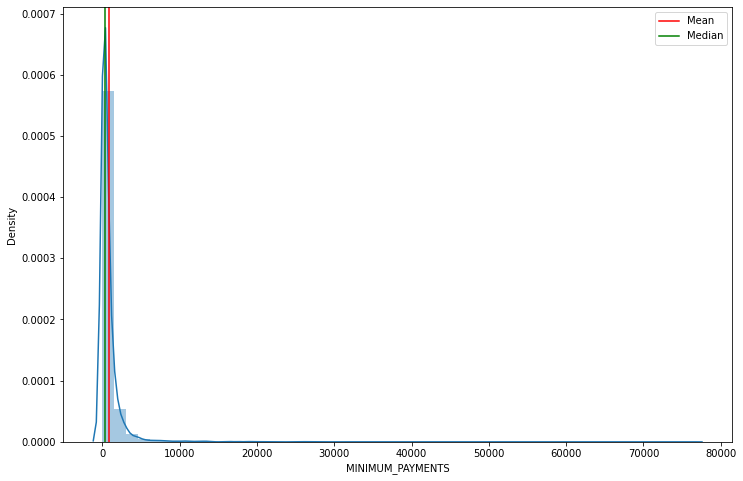

In [ ]:
plt.figure(figsize=[12,8])
sns.distplot(df.MINIMUM_PAYMENTS)
plt.axvline(df.MINIMUM_PAYMENTS.mean(),color='r',label='Mean')
plt.axvline(df.MINIMUM_PAYMENTS.median(),color='g',label='Median')
plt.legend()

Imputing values with median.

In [ ]:
med = df.MINIMUM_PAYMENTS.median()
df.MINIMUM_PAYMENTS.fillna(med,inplace=True)

In [ ]:
df = df[~df.isnull().any(axis=1)]

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

No null values now.

**Outlier Removal**

In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
(((df < q1 - 1.5*IQR) | (df > q3 + 1.5*IQR)).sum()/df.shape[0])*100

BALANCE                              7.766231
BALANCE_FREQUENCY                   16.672254
CASH_ADVANCE                        11.509666
CASH_ADVANCE_FREQUENCY               5.866577
CASH_ADVANCE_TRX                     8.984244
CREDIT_LIMIT                         2.771259
CUST_ID                              0.000000
INSTALLMENTS_PURCHASES               9.688233
MINIMUM_PAYMENTS                    10.157560
ONEOFF_PURCHASES                    11.319701
ONEOFF_PURCHASES_FREQUENCY           8.738407
PAYMENTS                             9.028942
PRC_FULL_PAYMENT                    16.471114
PURCHASES                            9.028942
PURCHASES_FREQUENCY                  0.000000
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000
PURCHASES_TRX                        8.559616
TENURE                              15.253101
dtype: float64

Data is highly skewed and had a lot of outliers.

By dropping outliers we can lose many rows as there are too many outliers in dataset. So making ranges to deal with extreme values.

In [ ]:
data = df.copy()

In [ ]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=500)),Range]=1
    data.loc[((data[c]>500)&(data[c]<=1000)),Range]=2
    data.loc[((data[c]>1000)&(data[c]<=3000)),Range]=3
    data.loc[((data[c]>3000)&(data[c]<=5000)),Range]=4
    data.loc[((data[c]>5000)&(data[c]<=10000)),Range]=5
    data.loc[((data[c]>10000)),Range]=6

In [ ]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
    data.loc[((data[c]>0.2)&(data[c]<=0.3)),Range]=3
    data.loc[((data[c]>0.3)&(data[c]<=0.4)),Range]=4
    data.loc[((data[c]>0.4)&(data[c]<=0.5)),Range]=5
    data.loc[((data[c]>0.5)&(data[c]<=0.6)),Range]=6
    data.loc[((data[c]>0.6)&(data[c]<=0.7)),Range]=7
    data.loc[((data[c]>0.7)&(data[c]<=0.8)),Range]=8
    data.loc[((data[c]>0.8)&(data[c]<=0.9)),Range]=9
    data.loc[((data[c]>0.9)&(data[c]<=1.0)),Range]=10

In [ ]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=5)),Range]=1
    data.loc[((data[c]>5)&(data[c]<=10)),Range]=2
    data.loc[((data[c]>10)&(data[c]<=15)),Range]=3
    data.loc[((data[c]>15)&(data[c]<=20)),Range]=4
    data.loc[((data[c]>20)&(data[c]<=30)),Range]=5
    data.loc[((data[c]>30)&(data[c]<=50)),Range]=6
    data.loc[((data[c]>50)&(data[c]<=100)),Range]=7
    data.loc[((data[c]>100)),Range]=8

In [ ]:
data.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

data.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0
3,12,3,3,3,0,1,5,0,1,7,1,1,0,1,0,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TENURE,8949.0,11.517935,1.337134,6.0,12.0,12.0,12.0,12.0
BALANCE_RANGE,8949.0,2.289641,1.317892,0.0,1.0,2.0,3.0,6.0
PURCHASES_RANGE,8949.0,1.591686,1.348604,0.0,1.0,1.0,3.0,6.0
ONEOFF_PURCHASES_RANGE,8949.0,1.018773,1.269939,0.0,0.0,1.0,2.0,6.0
INSTALLMENTS_PURCHASES_RANGE,8949.0,0.943569,1.082767,0.0,0.0,1.0,1.0,6.0
CASH_ADVANCE_RANGE,8949.0,1.241144,1.577941,0.0,0.0,0.0,3.0,6.0
CREDIT_LIMIT_RANGE,8949.0,3.778523,1.175342,1.0,3.0,3.0,5.0,6.0
PAYMENTS_RANGE,8949.0,2.335792,1.286512,0.0,1.0,2.0,3.0,6.0
MINIMUM_PAYMENTS_RANGE,8949.0,1.632361,0.988788,1.0,1.0,1.0,2.0,6.0
BALANCE_FREQUENCY_RANGE,8949.0,8.931948,2.262786,0.0,9.0,10.0,10.0,10.0


In [ ]:
x= np.asarray(data)

In [ ]:
x.shape

(8949, 17)

Normalising input data.

In [ ]:
scale = StandardScaler()
xstd = scale.fit_transform(x)
xstd.shape

(8949, 17)

## Dimentionality reduction using PCA.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(xstd)
print(pca.explained_variance_ratio_*100)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_*100)
print(cum_var_exp)

[32.30932296 22.58923624  9.0681521   7.37915947  6.28434187  5.04700229
  4.25999437  3.41724369  2.73109835  1.81004327  1.21996859  1.0745021
  1.01499278  0.62738789  0.59311825  0.41641511  0.15802065]
[ 32.30932296  54.8985592   63.9667113   71.34587077  77.63021265
  82.67721494  86.9372093   90.354453    93.08555135  94.89559462
  96.11556321  97.19006531  98.20505809  98.83244599  99.42556423
  99.84197935 100.        ]


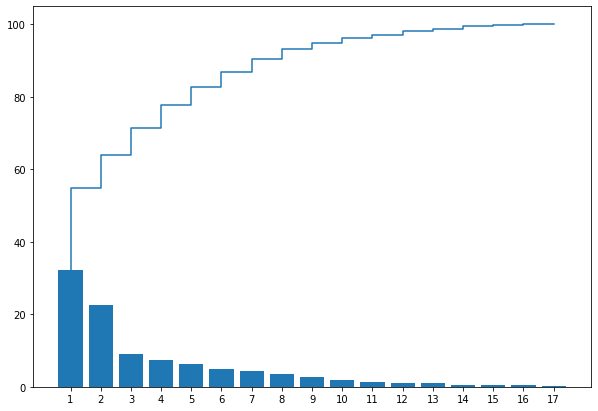

In [ ]:
plt.figure(figsize=[10,7])
x_ax=range(1,len(pca.explained_variance_ratio_)+1)

plt.bar(x_ax,pca.explained_variance_ratio_*100)
plt.step(x_ax,cum_var_exp)
plt.xticks(x_ax)
plt.show()

Selecting 11 dimentions having 96% of the total variance.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(11)
xpca = pca.fit_transform(xstd)

In [ ]:
xpca.shape

(8949, 11)

## Model Creation

**Kmeans**

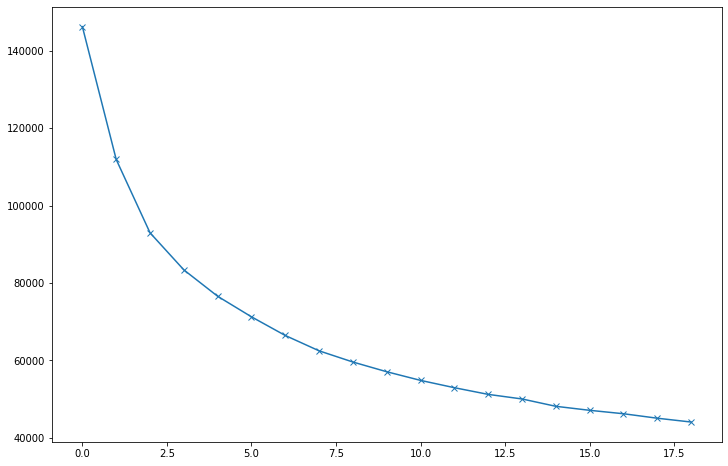

In [ ]:
n_clusters=20
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(xpca)
    cost.append(kmean.inertia_)

plt.figure(figsize=[12,8])
plt.plot(cost, marker='x')

Choosing 5 clusters.

We will analyse clustering data using both above clusters.

In [ ]:
kmean= KMeans(5)
kmean.fit(xpca)
labels=kmean.labels_

In [ ]:
kmeans5=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
kmeans5.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,4
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,1
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,2
3,12,3,3,3,0,1,5,0,1,7,1,1,0,1,0,1,1,4
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,4


Analysing Clusters

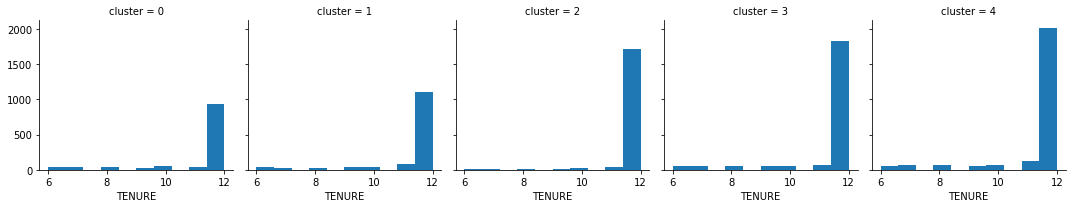

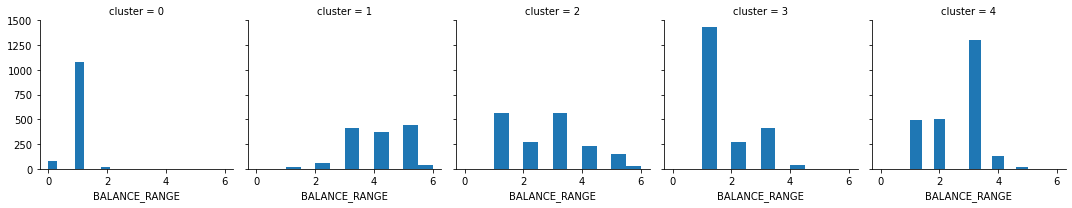

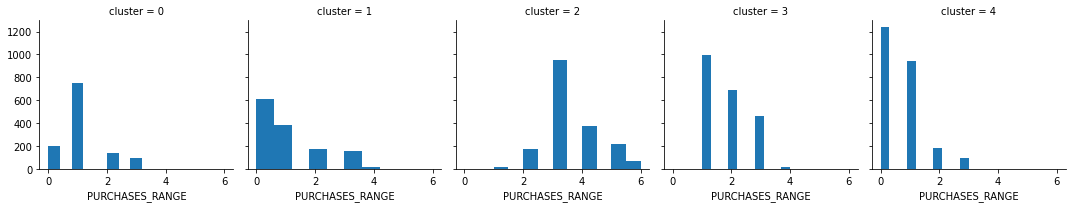

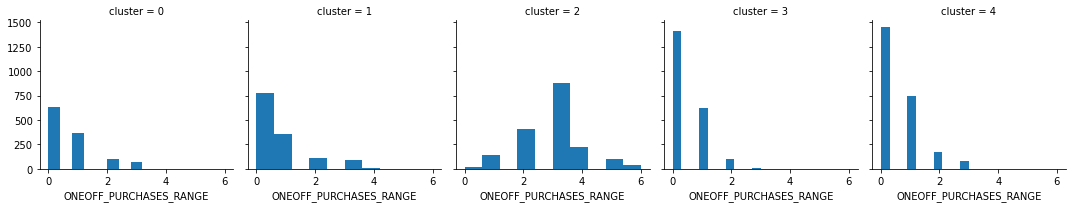

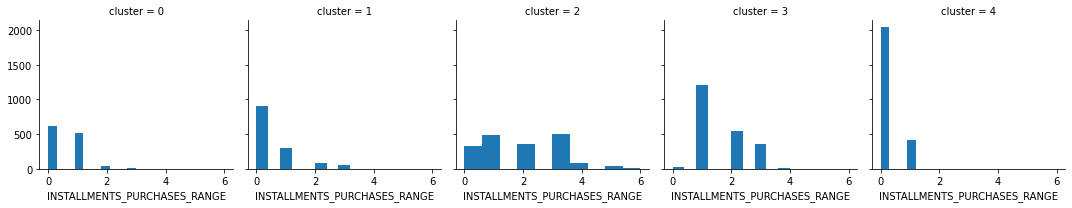

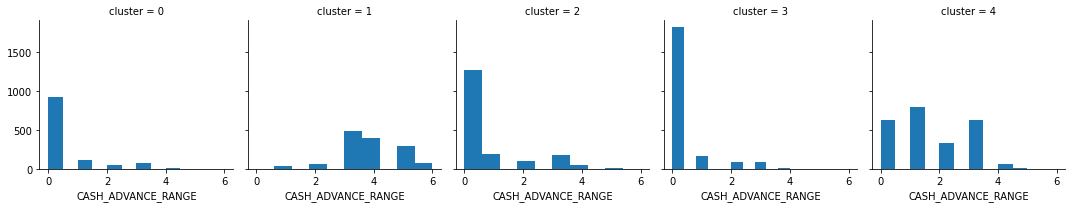

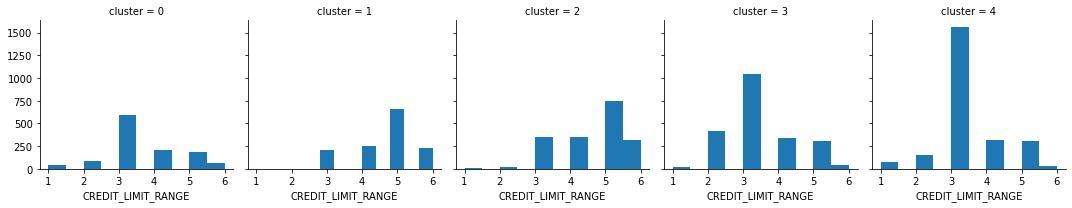

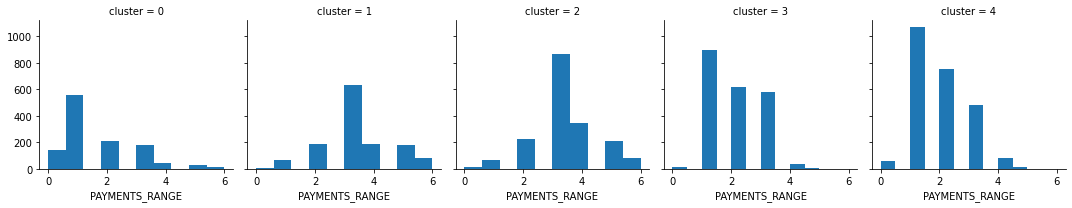

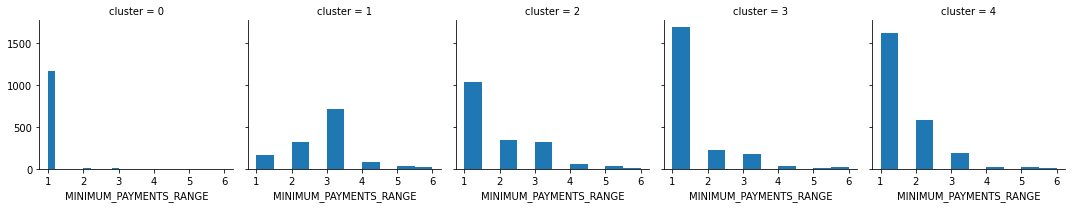

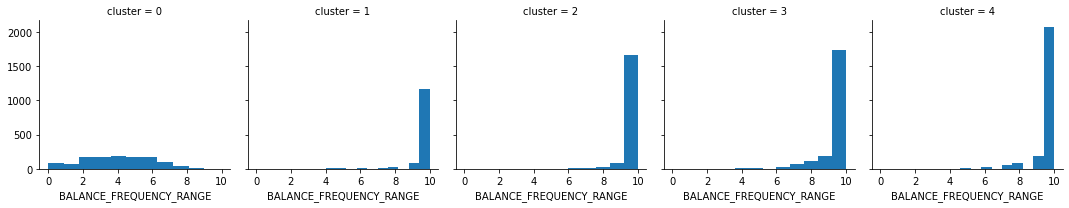

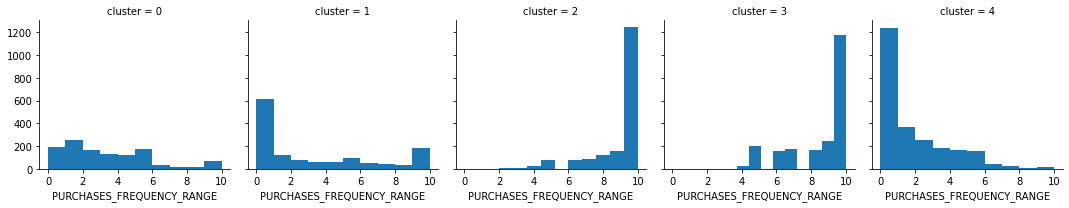

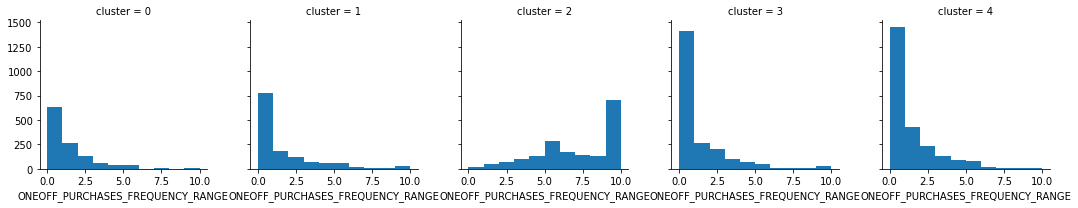

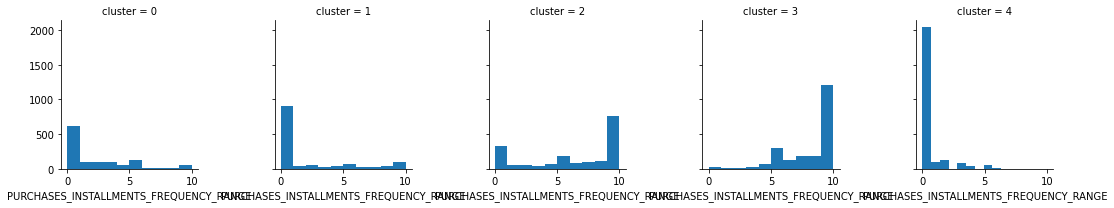

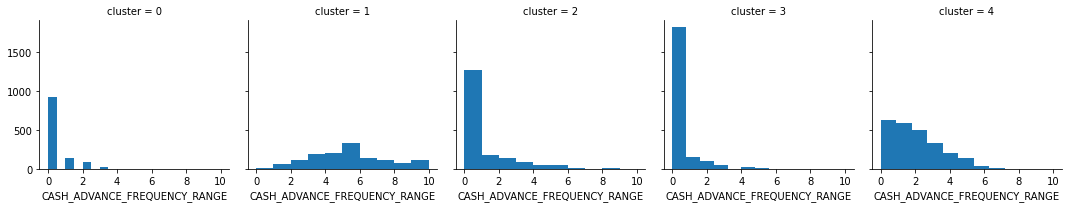

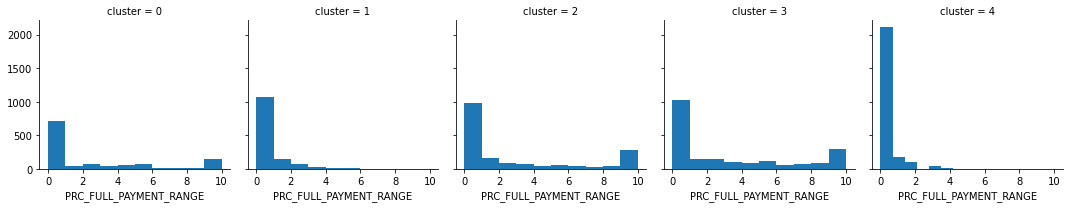

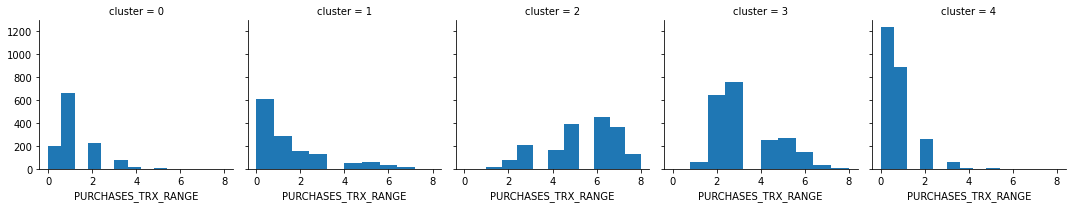

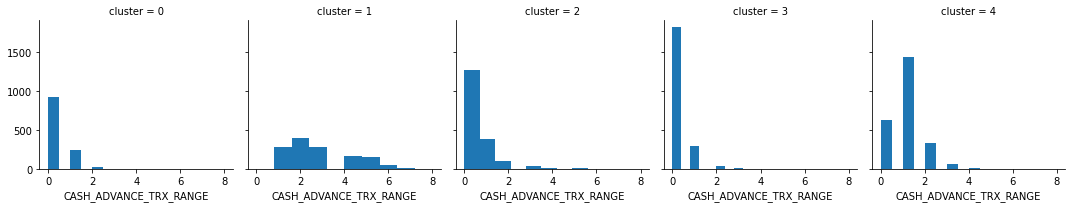

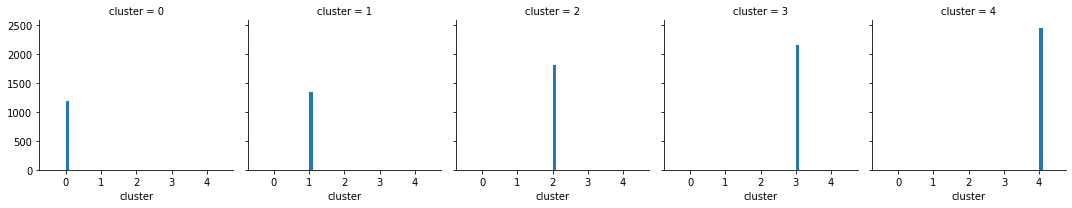

In [ ]:
for c in kmeans5:
    grid= sns.FacetGrid(kmeans5, col='cluster')
    grid.map(plt.hist, c)

In [ ]:
kmeans5.cluster.value_counts().sort_index()

0    1183
1    1343
2    1808
3    2161
4    2454
Name: cluster, dtype: int64

In [ ]:
kmeans5.groupby('cluster').agg(np.mean)

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
cluster,,,,,,,,,,,,,,,,,
0,11.283178,0.952663,1.114117,0.672866,0.528318,0.445478,3.511412,1.620456,1.023669,3.919696,2.939983,0.989011,1.898563,0.354184,2.278107,1.218935,0.248521
1,11.467610,3.947133,0.956069,0.667163,0.470588,3.786299,4.673864,3.329114,2.667163,9.727476,2.851824,1.306776,1.851824,4.908414,0.395383,1.348474,2.816083
2,11.862832,2.563053,3.447456,2.878872,1.835730,0.686394,4.528761,3.331305,1.738938,9.842367,9.098451,6.874447,6.203540,0.769912,2.537611,5.386062,0.440819
3,11.473392,1.575197,1.767700,0.402591,1.595095,0.291069,3.285516,1.888015,1.401203,9.570106,8.636742,0.907450,7.984267,0.336418,2.865803,3.285053,0.187413
4,11.443765,2.454768,0.647514,0.550122,0.171557,1.477180,3.298696,1.797881,1.484515,9.680114,1.414833,0.962510,0.461288,1.819071,0.248166,0.669112,0.936023


* Cluster0 People with high purchase frequency and purchase transactions.

* Cluster1 This group has the highest balance customers with highest cash advance and frequency taking but are the low money spenders.

* Cluster2 Customers with little less balance than cluster 1 customers but highest spending and purchase frequencies.

* Cluster3 Lowest spenders of all.

* Cluster4 People with Least balance.

(Clsuter number changes when re run)

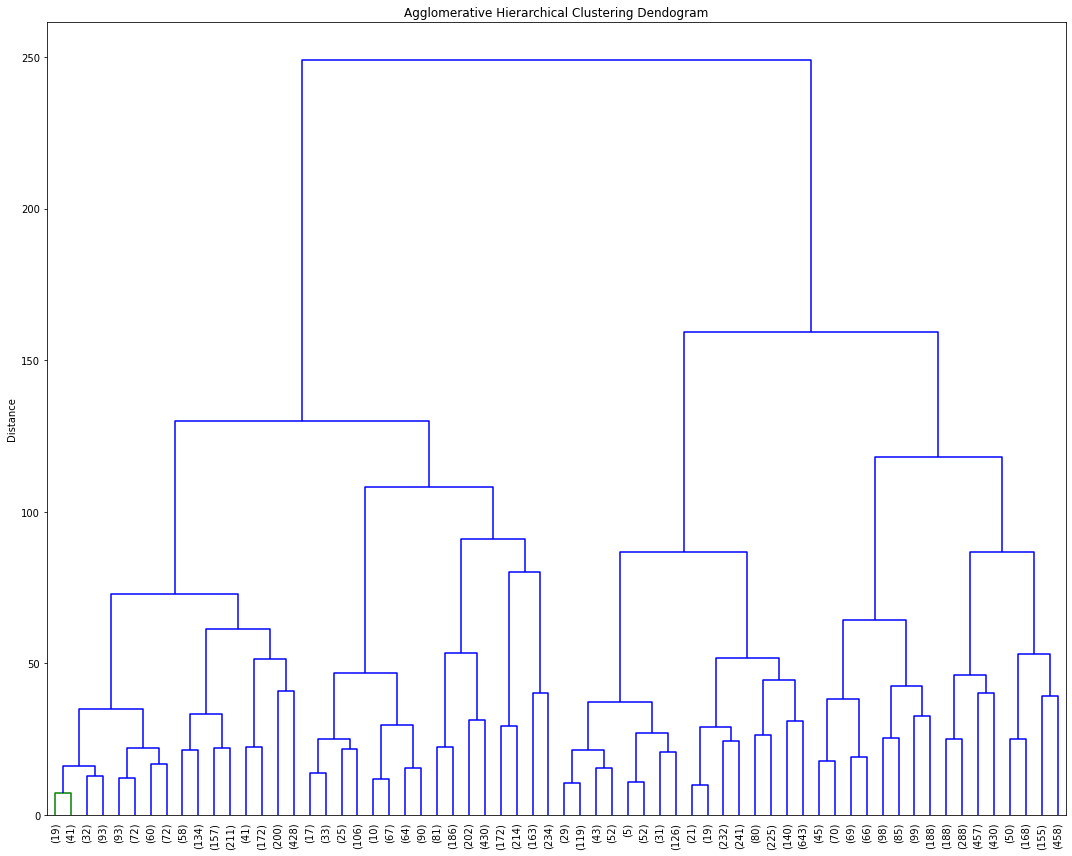

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(15, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.ylabel('Distance')
Z = linkage(xpca, 'ward')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

Trying Agromerative Clustering with 4 clusters.

In [ ]:
aglo = AgglomerativeClustering(4)
aglo.fit(xpca)
labels=aglo.labels_

In [ ]:
aglo4=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
aglo4.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,0
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,2
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,1
3,12,3,3,3,0,1,5,0,1,7,1,1,0,1,0,1,1,0
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,0


In [ ]:
aglo4.cluster.value_counts().sort_index()

0    2914
1    2094
2    2058
3    1883
Name: cluster, dtype: int64

In [ ]:
aglo4.groupby('cluster').mean()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
cluster,,,,,,,,,,,,,,,,,
0,10.794784,1.662320,1.087165,0.642759,0.567261,0.786205,3.370625,1.589568,1.238504,7.285518,3.483185,1.072066,2.375772,0.940975,1.413864,1.339053,0.484214
1,11.853391,2.773161,3.050621,2.561605,1.422636,1.207736,4.429322,3.168577,1.924546,9.857689,8.180516,6.177650,4.932665,1.434575,2.053009,4.579752,0.828080
2,11.863460,3.143829,0.267250,0.221088,0.077745,2.724976,3.906220,2.577259,2.019922,9.650146,0.600583,0.373664,0.237609,3.431001,0.395044,0.305151,1.923712
3,11.886352,1.789166,2.197557,0.756771,1.939458,0.360595,3.546468,2.300584,1.493362,9.665428,9.228890,1.512480,8.812533,0.417950,2.859267,4.042485,0.250133


## Visualization of Clusters

Using 2 PCA dimentions for visualizations.

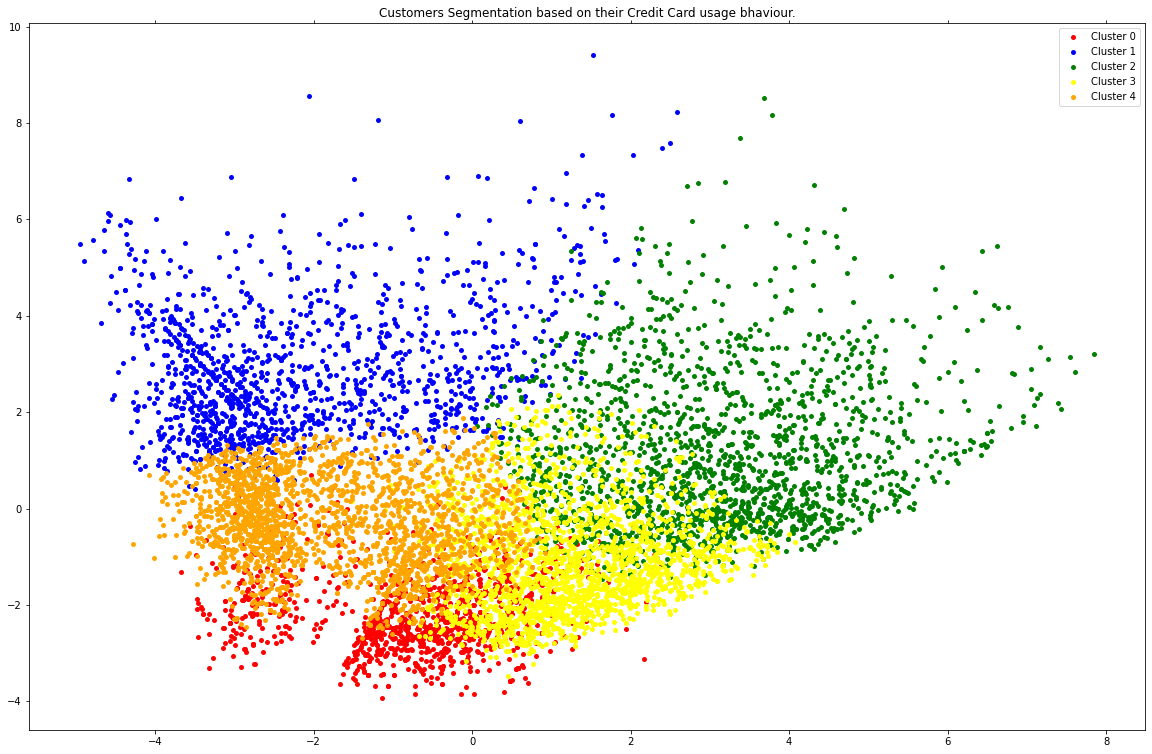

In [ ]:
colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange'}

names = {0: 'Cluster 0', 
         1: 'Cluster 1', 
         2: 'Cluster 2', 
         3: 'Cluster 3', 
         4: 'Cluster 4'}
  
df = pd.DataFrame({'x': xpca[:,0], 'y':xpca[:,1], 'label':kmeans5['cluster']}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


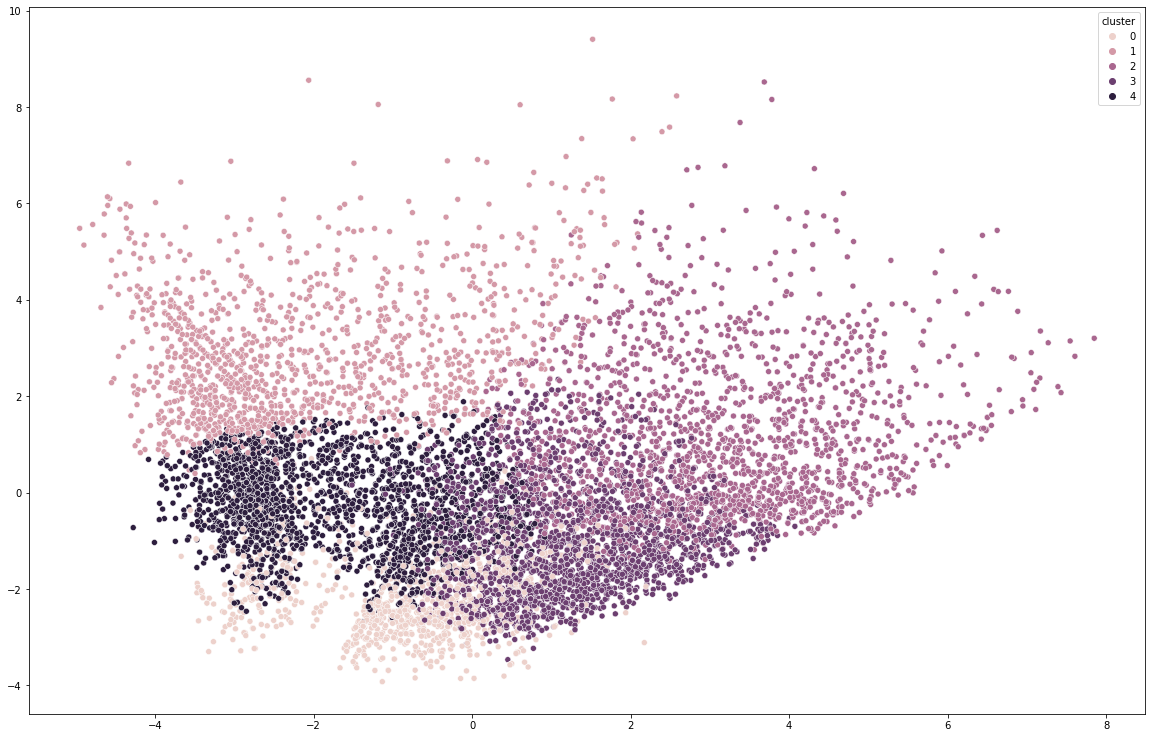

In [ ]:
plt.figure(figsize=[20, 13]) 

sns.scatterplot(xpca[:,0],xpca[:,1],hue=kmeans5.cluster)